In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/bank%20full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
bank.drop(["education","contact","campaign","pdays","previous"],inplace=True,axis=1)

In [5]:
bank

,age,job,marital,default,balance,housing,loan,day,month,duration,poutcome,y
0,58,management,married,no,2143,yes,no,5,may,261,unknown,no
1,44,technician,single,no,29,yes,no,5,may,151,unknown,no
2,33,entrepreneur,married,no,2,yes,yes,5,may,76,unknown,no
3,47,blue-collar,married,no,1506,yes,no,5,may,92,unknown,no
4,33,unknown,single,no,1,no,no,5,may,198,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,17,nov,977,unknown,yes
45207,71,retired,divorced,no,1729,no,no,17,nov,456,unknown,yes
45208,72,retired,married,no,5715,no,no,17,nov,1127,success,yes
45209,57,blue-collar,married,no,668,no,no,17,nov,508,unknown,no


In [6]:
bankk=pd.get_dummies(bank,columns=["job","marital","poutcome"])
bankk

,age,default,balance,housing,loan,day,month,duration,y,job_admin.,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,no,0,...,0,0,0,0,1,0,0,0,0,1
1,44,no,29,yes,no,5,may,151,no,0,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,no,0,...,0,0,0,0,1,0,0,0,0,1
3,47,no,1506,yes,no,5,may,92,no,0,...,0,0,0,0,1,0,0,0,0,1
4,33,no,1,no,no,5,may,198,no,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,yes,0,...,1,0,0,0,1,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,yes,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,yes,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,no,0,...,0,0,0,0,1,0,0,0,0,1


In [7]:
import numpy as np
bankk["default"]=np.where(bankk.default.str.contains("yes"),1,0)
bankk["housing"]=np.where(bankk.housing.str.contains("yes"),1,0)
bankk["loan"]=np.where(bankk.loan.str.contains("yes"),1,0)
bankk["y"]=np.where(bank.y.str.contains("yes"),1,0)
bankk

,age,default,balance,housing,loan,day,month,duration,y,job_admin.,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,5,may,151,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,may,92,0,0,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,5,may,198,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,1,0,...,1,0,0,0,1,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,1,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,0,0,...,0,0,0,0,1,0,0,0,0,1


In [8]:
month_label={"month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}}
bankk=bankk.replace(month_label)
bankk

,age,default,balance,housing,loan,day,month,duration,y,job_admin.,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,5,5,151,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,5,92,0,0,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,5,5,198,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,1,0,...,1,0,0,0,1,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,1,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
X=pd.concat([bankk.iloc[:,:8],bankk.iloc[:,9:]],axis=1)
Y=bankk.iloc[:,8]

In [16]:
lr=LogisticRegression()
lr.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
ypred=lr.predict(X)
ypred_df=pd.DataFrame({"Y":Y,"Predicted":ypred})
ypred_df

,Y,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y,ypred),classification_report(Y,ypred))

[[39150   772]
 [ 3919  1370]]               precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.64      0.26      0.37      5289

    accuracy                           0.90     45211
   macro avg       0.77      0.62      0.66     45211
weighted avg       0.88      0.90      0.88     45211



In [21]:
#model accuracy is calculated by (a+d)/(a+b+c+d)
(39150+1370)/(39150+772+3919+1370)

0.8962420649841852

In [22]:
#as 0.896>0.5
lr.predict_proba(X)[:,1]

array([0.03226552, 0.02491135, 0.01348817, ..., 0.96153439, 0.13390467,
       0.41331543])

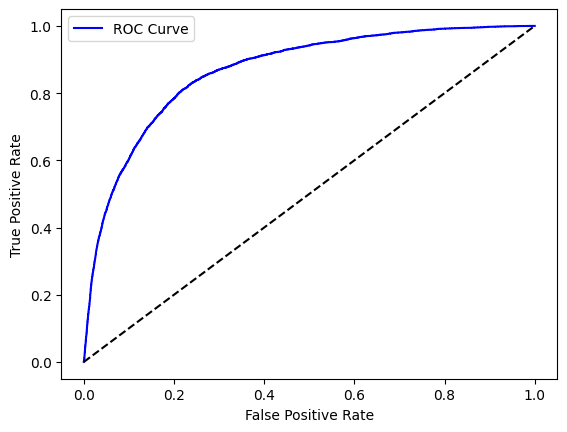

roc_auc_score is  0.6198452315727144


In [27]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

fpr,tpr,thresholds=roc_curve(Y,lr.predict_proba(X)[:,1])
aucs=roc_auc_score(Y,ypred)

plt.plot(fpr,tpr,color="blue",label="ROC Curve")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("roc_auc_score is ",aucs)